# Autores: 
**Gabriel Roberto (221020870) e Jean Soares (241033810)**

# Introdução e Preparação

In [1]:
import tensorflow as tf
from d2l import tensorflow as d2l
d2l.use_svg_display()
import pdb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-12-03 19:14:42.713008: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 19:14:43.041461: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 19:14:43.043099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 19:14:45.598144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
class MNIST(d2l.DataModule):
    def __init__(self, batch_size=64):
        super().__init__()
        self.save_hyperparameters()
        self.train, self.val = tf.keras.datasets.mnist.load_data()

In [3]:
data = MNIST()
print(len(data.train[0]), len(data.val[0]))
print(data.train[0].shape)

60000 10000
(60000, 28, 28)


In [4]:
@d2l.add_to_class(MNIST) #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    process = lambda X, y: (tf.expand_dims(X, axis=3) / 255,
    tf.cast(y, dtype='int32'))
    resize_fn = lambda X, y: (tf.image.resize_with_pad(X, *self.resize), y)
    shuffle_buf = len(data[0]) if train else 1
    return tf.data.Dataset.from_tensor_slices(process(*data)).batch(
    self.batch_size).shuffle(shuffle_buf)


In [5]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

2024-12-03 19:14:53.682716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-03 19:14:53.684502: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-12-03 19:14:54.079095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2024-12-03 19:14

(64, 28, 28, 1) <dtype: 'float32'> (64,) <dtype: 'int32'>


# Implementação MLP

## 2a) Perceptron com uma camada escondida, função de ativação logística, função custo SSE e otimização por descida de gradiente.


In [6]:
class MLP_sigmoid(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr, loss_fn = tf.keras.losses.MeanSquaredError, optimizer = tf.keras.optimizers.SGD):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='sigmoid'),
            tf.keras.layers.Dense(num_outputs, activation='sigmoid')])

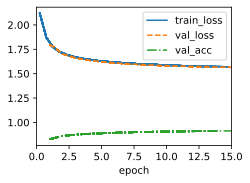

In [7]:
model_2a = MLP_sigmoid(num_outputs=10, num_hiddens=128, lr=0.1)
trainer = d2l.Trainer(max_epochs=15)
trainer.fit(model_2a, data)


### Acurácia

In [8]:
test_acc_2a = d2l.evaluate_accuracy(model_2a, data.val_dataloader())
test_acc_2a

2024-12-03 19:20:29.684964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]
2024-12-03 19:20:29.685553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]


0.9129

## (Extra) Modelo com duas camadas

In [58]:
class MLP_sigmoid_extra(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr, loss_fn = tf.keras.losses.MeanSquaredError, optimizer = tf.keras.optimizers.SGD):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='sigmoid'),
            tf.keras.layers.Dense(num_hiddens, activation='sigmoid'),
            tf.keras.layers.Dense(num_outputs, activation='sigmoid')])

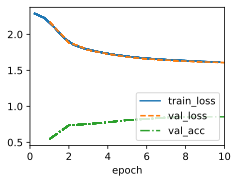

In [59]:
model_2a_extra = MLP_sigmoid_extra(num_outputs=10, num_hiddens=128, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model_2a_extra, data)


In [60]:
test_acc_2a_extra = d2l.evaluate_accuracy(model_2a_extra, data.val_dataloader())
test_acc_2a_extra

2024-12-03 20:47:28.544267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]
2024-12-03 20:47:28.544775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]


0.8552

## 2b) Saída do tipo softmax, custo "entropia cruzada"

In [9]:
class MLP_softmax(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr, loss_fn = tf.keras.losses.SparseCategoricalCrossentropy, optimizer = tf.keras.optimizers.SGD):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='sigmoid'),
            tf.keras.layers.Dense(num_outputs, activation='softmax')])

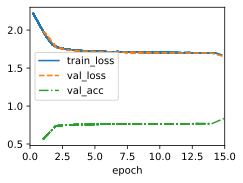

In [10]:
model_2b = MLP_softmax(num_outputs=10, num_hiddens=128, lr=0.1)
trainer = d2l.Trainer(max_epochs=15)
trainer.fit(model_2b, data)


### Acurácia

In [11]:
test_acc_2b = d2l.evaluate_accuracy(model_2b, data.val_dataloader())
test_acc_2b

2024-12-03 19:24:55.095824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]
2024-12-03 19:24:55.096354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]


0.8403

## 2c) Otimizador Adam

In [12]:
class MLP_adam(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr, loss_fn = tf.keras.losses.SparseCategoricalCrossentropy, optimizer = tf.keras.optimizers.Adam):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='sigmoid'),
            tf.keras.layers.Dense(num_outputs, activation='softmax')])

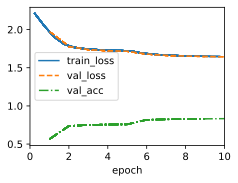

In [13]:
model_2c = MLP_adam(num_outputs=10, num_hiddens=128, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model_2c, data)


### Acurácia

In [14]:
test_acc_2c = d2l.evaluate_accuracy(model_2c, data.val_dataloader())
test_acc_2c

2024-12-03 19:27:56.500352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2024-12-03 19:27:56.500979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]


0.8333

## 2d) A função Relu

In [15]:
class MLP_relu(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr, loss_fn = tf.keras.losses.SparseCategoricalCrossentropy, optimizer = tf.keras.optimizers.Adam):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='relu'),
            tf.keras.layers.Dense(num_outputs, activation='softmax')])

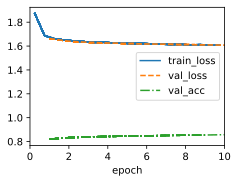

In [16]:
model_2d = MLP_relu(num_outputs=10, num_hiddens=128, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model_2d, data)

### Acurácia

In [17]:
test_acc_2d = d2l.evaluate_accuracy(model_2d, data.val_dataloader())
test_acc_2d

2024-12-03 19:30:58.965606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]
2024-12-03 19:30:58.966023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]


0.8571

## 2e) Redes maiores

### 256 neurônios escondidos

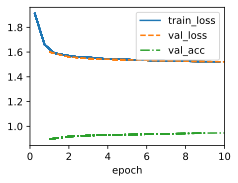

In [19]:
model_2e_1 = MLP_relu(num_outputs=10, num_hiddens=256, lr=0.1)
trainer = d2l.Trainer(max_epochs=12)
trainer.fit(model_2e_1, data)

### Acurácia

In [20]:
test_acc_2e_1 = d2l.evaluate_accuracy(model_2e_1, data.val_dataloader())
test_acc_2e_1

2024-12-03 19:34:16.642956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2024-12-03 19:34:16.643798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]


0.9459

### Duas camadas escondidas

In [18]:
class MLP_relu_maior(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr, loss_fn = tf.keras.losses.SparseCategoricalCrossentropy, optimizer = tf.keras.optimizers.Adam):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='relu'),
            tf.keras.layers.Dense(num_hiddens/2, activation='relu'),
            tf.keras.layers.Dense(num_outputs, activation='softmax')])

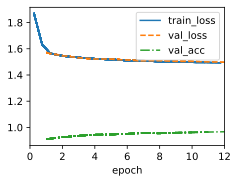

In [28]:
model_2e_2 = MLP_relu_maior(num_outputs=10, num_hiddens=256, lr=0.1)
trainer = d2l.Trainer(max_epochs=12)
trainer.fit(model_2e_2, data)

### Acurácia

In [29]:
test_acc_2e_2 = d2l.evaluate_accuracy(model_2e_2, data.val_dataloader())
test_acc_2e_2

2024-12-03 19:48:44.362229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]
2024-12-03 19:48:44.362630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]


0.9666

## Comparação final

| Modelo | Acurácia |
| -------| ---------|
| Sigmoide | 91.3% |
| (Extra) Sigmoide (duas camadas) | 85.5% |
| Softmax | 84.0% |
| Adam | 83.3% |
| Relu | 85.7% |
| Relu (2x neurônios escondidos) | 94.6% |
| Relu (duas camadas + 2x neurônios escondidos) | 96.6% |

O modelo com função de ativação sigmoide apresentou uma acurácia maior que a dos três modelos seguintes (softmax, adam e relu). Entretanto, quando esse último modelo foi modificado como rede com mais neurônios ou mais de uma camada, ele apresentou o melhor desempenho entre os demais.
Para comparar o desempenho do modelo que utiliza a função sigmoide com o modelo que utiliza relu e softmax, foi treinada aquele com uma camada adicional, apresentando uma acurácia menor.
Assim, inferimos que o último modelo apresenta um melhor resultado quando desejadas redes maiores.   

# Visualização

In [30]:
@d2l.add_to_class(MNIST) #@save
def text_labels(self, indices):
 """Return text labels."""
 labels = ['0', '1', '2', '3', '4',
 '5', '6', '7', '8', '9']
 return [labels[int(i)] for i in indices]

2024-12-03 19:48:45.451337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]
2024-12-03 19:48:45.451750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]


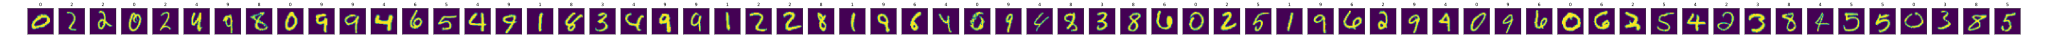

In [31]:
@d2l.add_to_class(MNIST) #@save
def visualize(self, batch, nrows=1, ncols=10, labels=[]):
 X, y = batch
 if not labels:
     labels = self.text_labels(y)
     d2l.show_images(tf.squeeze(X), nrows, y.numpy().size, titles=labels)

i=0
for X, y in data.val_dataloader():
    i+=1
    if i == 23: # Este batch não possui a classe '7'
        data.visualize([X,y]) 

1º minibatch:


2024-12-03 20:08:44.900683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2024-12-03 20:08:44.901225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]


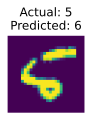

2º minibatch:


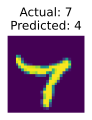

3º minibatch:


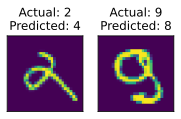

4º minibatch:


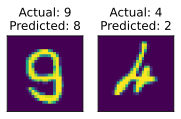

5º minibatch:


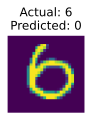

6º minibatch:


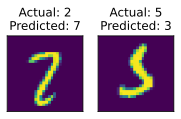

7º minibatch:


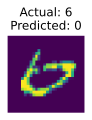

8º minibatch:


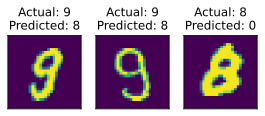

9º minibatch:


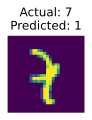

10º minibatch:


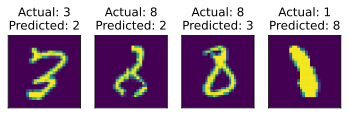

11º minibatch:


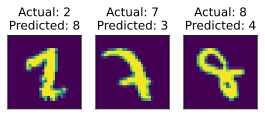

12º minibatch:


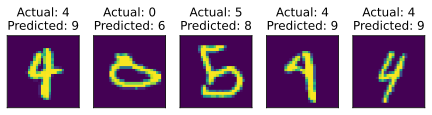

13º minibatch:


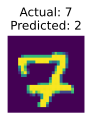

14º minibatch:


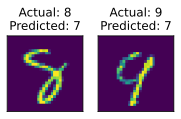

15º minibatch:


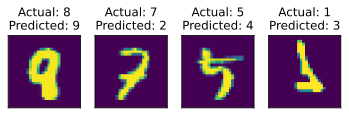

16º minibatch:


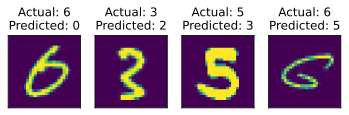

17º minibatch:


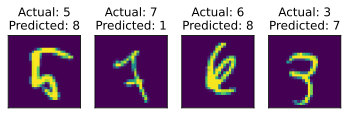

18º minibatch:


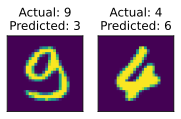

19º minibatch:


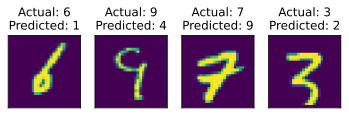

20º minibatch:


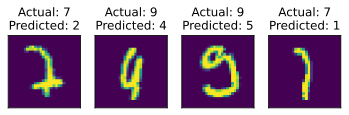

21º minibatch:


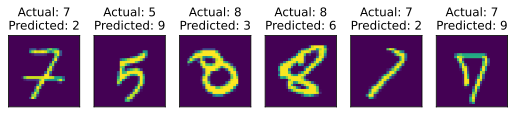

22º minibatch:


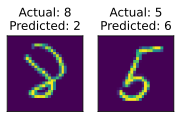

23º minibatch:


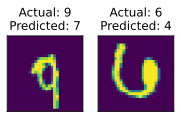

24º minibatch:


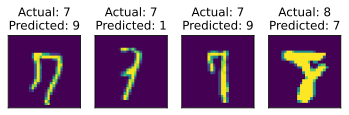

25º minibatch:


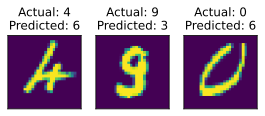

26º minibatch:


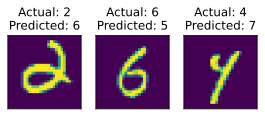

27º minibatch:


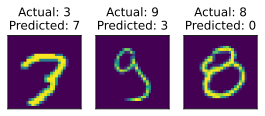

28º minibatch:


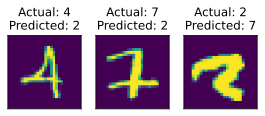

29º minibatch:


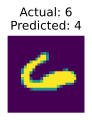

30º minibatch:


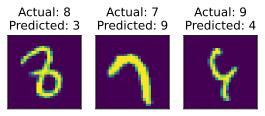

31º minibatch:


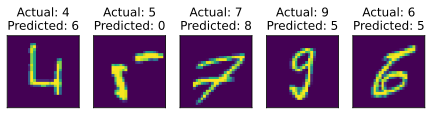

32º minibatch:


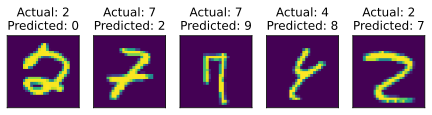

33º minibatch:


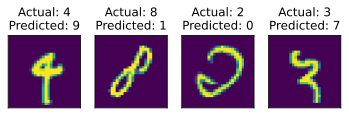

34º minibatch:


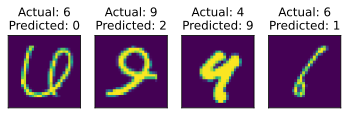

35º minibatch:


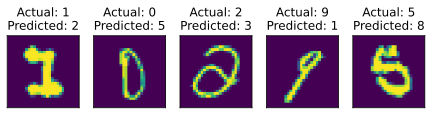

36º minibatch:


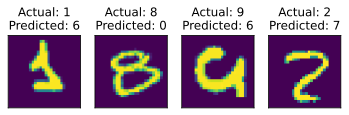

38º minibatch:


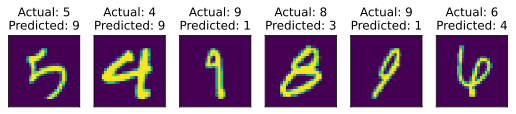

39º minibatch:


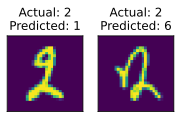

41º minibatch:


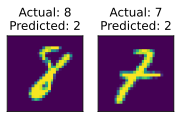

42º minibatch:


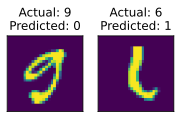

43º minibatch:


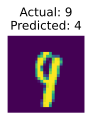

44º minibatch:


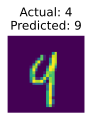

45º minibatch:


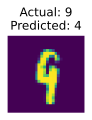

46º minibatch:


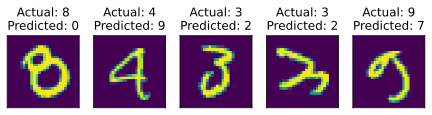

47º minibatch:


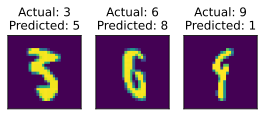

48º minibatch:


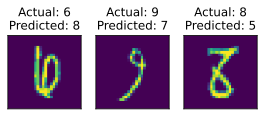

49º minibatch:


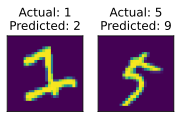

50º minibatch:


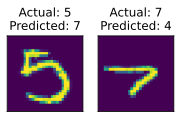

51º minibatch:


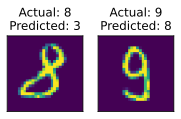

52º minibatch:


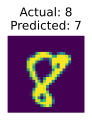

53º minibatch:


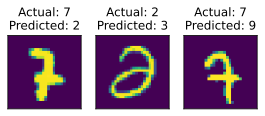

In [57]:
i=0
shown=0
for X, y in data.val_dataloader():
    i+=1
    if shown>50: # Mostra apenas os 50 primeiros batches com classificação errada
        break
    preds=tf.argmax(model_2e_2(X),axis=1)
    wrong=tf.cast(preds,y.dtype)!=y
    X, y, preds = X[wrong], y[wrong], preds[wrong]
    
    if y.numpy().size == 0:
        continue

    shown+=1
    labels = [ f'Actual: {a[0]}\nPredicted: {b[0]}' for a, b in zip(data.text_labels(y), data.text_labels(preds))]
    if y.numpy().size == 1:
        plt.figure(figsize=(1.4,1.4))
        print(f'{i}º minibatch:')
        plt.axis('off')
        plt.title(f'Actual: {data.text_labels(y)[0]}\nPredicted: {data.text_labels(preds)[0]}')
        plt.imshow(tf.squeeze(X))
        plt.show()
    else:
        print(f'{i}º minibatch:')
        d2l.show_images(tf.squeeze(X), 1, y.numpy().size, titles=labels)
        plt.show()
        

Dos erros cometidos nos minibatches acima, existem alguns que poderiam ser igualmente cometidos por humanos. Veja:
| Minibatch | Correto | Apontado |
| --------- | ------- | -------- |
| 1         | 5       | 6        |
| 6         | 7       | 2        |
| 15        | 8       | 9        |
| 19        | 9       | 4        |
| 20        | 9       | 4        |
| 20        | 7       | 1        |
| 30        | 9       | 4        |
| 38        | 6       | 4        |
| 42        | 6       | 1        |


# Matriz de confusão

In [50]:
global_conf_matrix = [[0 for i in range (10)] for j in range(10)]
i=0
for X, y in data.val_dataloader():
    i+=1
    preds=tf.argmax(model_2e_2(X),axis=1)
    conf_matrix = confusion_matrix(y, preds, labels=tf.range(10))
    # ConfusionMatrixDisplay(conf_matrix).plot()
    print(f'Adicionando o {i}º minibatch...')
    # plt.show()
    global_conf_matrix += conf_matrix

2024-12-03 20:05:48.663276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2024-12-03 20:05:48.663863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_1}}]]


Adicionando o 1º minibatch...
Adicionando o 2º minibatch...
Adicionando o 3º minibatch...
Adicionando o 4º minibatch...
Adicionando o 5º minibatch...
Adicionando o 6º minibatch...
Adicionando o 7º minibatch...
Adicionando o 8º minibatch...
Adicionando o 9º minibatch...
Adicionando o 10º minibatch...
Adicionando o 11º minibatch...
Adicionando o 12º minibatch...
Adicionando o 13º minibatch...
Adicionando o 14º minibatch...
Adicionando o 15º minibatch...
Adicionando o 16º minibatch...
Adicionando o 17º minibatch...
Adicionando o 18º minibatch...
Adicionando o 19º minibatch...
Adicionando o 20º minibatch...
Adicionando o 21º minibatch...
Adicionando o 22º minibatch...
Adicionando o 23º minibatch...
Adicionando o 24º minibatch...
Adicionando o 25º minibatch...
Adicionando o 26º minibatch...
Adicionando o 27º minibatch...
Adicionando o 28º minibatch...
Adicionando o 29º minibatch...
Adicionando o 30º minibatch...
Adicionando o 31º minibatch...
Adicionando o 32º minibatch...
Adicionando o 33º

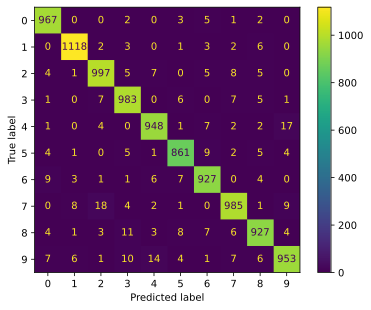

In [51]:
ConfusionMatrixDisplay(global_conf_matrix).plot()

In [56]:
most_confused_pairs = []
for i in range(10):
    for j in range(10):
        if i != j:
            if global_conf_matrix[i, j] > 0:
                most_confused_pairs.append((i, j, global_conf_matrix[i, j]))
                
most_confused_pairs.sort(key=lambda x: x[2], reverse=True)

for i, j, count in most_confused_pairs:
    if count < 8: # Exibindo sommente as classes mais confundidas
        break
    print(f"A classe {i} foi confundida com a classe {j} por {count} {'vezes' if count > 1 else 'vez'}.")

A classe 7 foi confundida com a classe 2 por 18 vezes.
A classe 4 foi confundida com a classe 9 por 17 vezes.
A classe 9 foi confundida com a classe 4 por 14 vezes.
A classe 8 foi confundida com a classe 3 por 11 vezes.
A classe 9 foi confundida com a classe 3 por 10 vezes.
A classe 5 foi confundida com a classe 6 por 9 vezes.
A classe 6 foi confundida com a classe 0 por 9 vezes.
A classe 7 foi confundida com a classe 9 por 9 vezes.
A classe 2 foi confundida com a classe 7 por 8 vezes.
A classe 7 foi confundida com a classe 1 por 8 vezes.
A classe 8 foi confundida com a classe 5 por 8 vezes.


Como visto nos minibatches que apresentavam erro atribuições incorretas (na seção 3), as confusões mais recorrentes que podem ser considerados de fácil erro por parte de um humano foram, de fato, 7 com 2, 9 com 4 e 4 com 9.